## 6.4 Machine Learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning & checking
#### 3. Data prep for regression analysis
#### 4. Hypothesis
#### 5. Regression analysis

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
# Establishing a path
path = r'/Users/Kate/Documents/Chocolate Bar Ratings Analysis'

In [5]:
# Importing data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_cleaned2.csv'), index_col=0)

### 2. Data cleaning & checking

In [6]:
df.head()

,Company,Review Date,Cocoa Percent,Company Location,Rating,Broad Origin,Cocoa category
0,A. Morin,2016,0.63,France,3.75,Sao Tome,Low Cocoa Mass
1,A. Morin,2015,0.70,France,2.75,Togo,Medium Cocoa Mass
2,A. Morin,2015,0.70,France,3.00,Togo,Medium Cocoa Mass
3,A. Morin,2015,0.70,France,3.50,Togo,Medium Cocoa Mass
4,A. Morin,2015,0.70,France,3.50,Peru,Medium Cocoa Mass


In [7]:
df.shape

(1795, 7)

In [11]:
# Rename the "Broad Origin" column

df = df.rename(columns = {'Broad Origin' : 'Origin'})

In [12]:
# Check for missing values

df.isnull().sum()

Company             0
Review Date         0
Cocoa Percent       0
Company Location    0
Rating              0
Origin              1
Cocoa category      0
dtype: int64

In [14]:
# Drop rows with missing values
df.dropna(subset=['Origin'], inplace=True)

In [15]:
# Verify that there are no more missing values
df.isnull().sum()

Company             0
Review Date         0
Cocoa Percent       0
Company Location    0
Rating              0
Origin              0
Cocoa category      0
dtype: int64

/Users/Kate/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

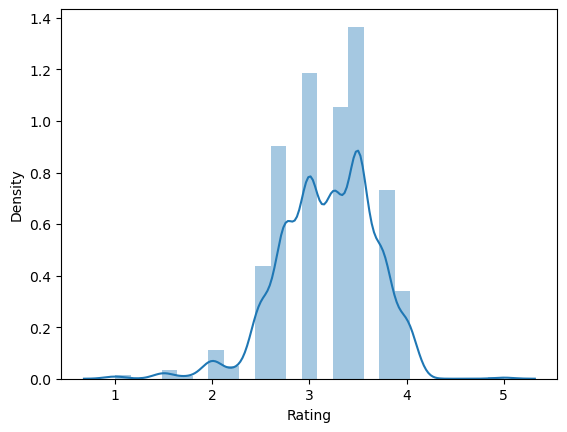

In [17]:
sns.distplot(df['Rating'], bins=25) # Shows extreme values

In [18]:
df['Rating'].mean() # Check the mean

3.186315496098105

In [19]:
df['Rating'].median() # Check the median

3.25

In [20]:
df['Rating'].max() # Check the max

5.0

### 3. Data prep for regression analysis 

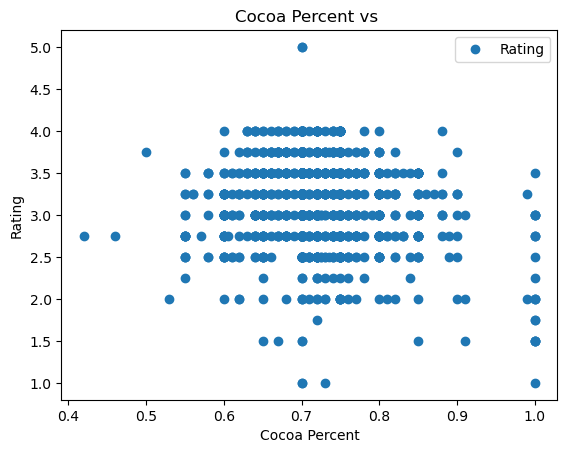

In [38]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Cocoa Percent', y='Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cocoa Percent vs ')  
plt.xlabel('Cocoa Percent')  
plt.ylabel('Rating')  
plt.show()

### 4. Hypothesis

Hypothesis: As Cocoa Percent goes up, Rating will go down. 

Note: Cocoa Percent refers to what percent of the chocolate bar's weight was contributed by cacao beans. Other ingredients may include sugar, cocoa butter, and flavorings like vanilla or spices. Most people prefer a mid-point cocoa percent, and darker chocolate (in the 85%+ range) seems to be less desired, and therefore lower-rated.

### 4. Regression analysis

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Cocoa Percent'].values.reshape(-1,1)
y = df['Rating'].values.reshape(-1,1)

In [40]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [41]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [42]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [44]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

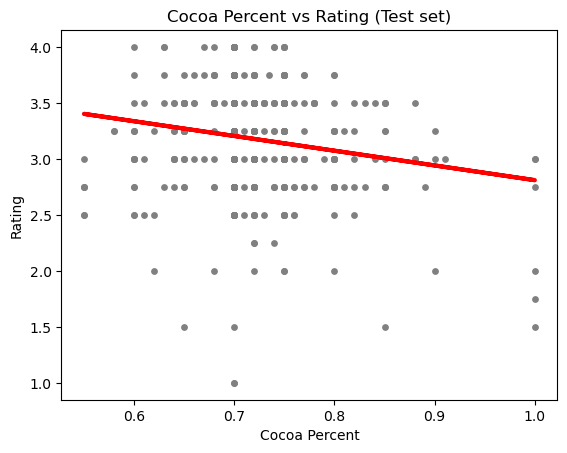

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Test set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

Q: Write your own interpretation of how well the line appears to fit the data.

A: The slope of the line is negative, implying a negative correlation between the two variables. I think this validates my hypothesis, showing that as the cocoa percent goes up, the average rating goes down. 

In [47]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [48]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.31583879]]
Mean squared error:  0.2244016702630918
R2 score:  0.018378690539589737


In [49]:
y_predicted

array([[3.13912603],
       [3.17860119],
       [3.20491797],
       [3.20491797],
       [3.07333409],
       [3.40229379],
       [3.20491797],
       [3.13912603],
       [3.25755152],
       [3.20491797],
       [3.2838683 ],
       [3.20491797],
       [3.17860119],
       [3.20491797],
       [3.13912603],
       [3.07333409],
       [3.00754215],
       [3.17860119],
       [3.20491797],
       [3.20491797],
       [3.20491797],
       [3.16544281],
       [3.40229379],
       [3.13912603],
       [3.33650185],
       [2.81016633],
       [3.13912603],
       [3.23123475],
       [3.20491797],
       [3.23123475],
       [3.17860119],
       [3.20491797],
       [3.20491797],
       [3.20491797],
       [3.00754215],
       [3.20491797],
       [3.17860119],
       [3.2838683 ],
       [3.17860119],
       [3.20491797],
       [3.20491797],
       [3.23123475],
       [3.13912603],
       [3.40229379],
       [3.20491797],
       [3.33650185],
       [3.11280925],
       [3.139

In [50]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.00,3.139126
1,2.75,3.178601
2,2.50,3.204918
3,3.25,3.204918
4,3.25,3.073334
5,2.75,3.402294
6,3.50,3.204918
7,2.50,3.139126
8,3.50,3.257552
9,3.25,3.204918


#### Compare how the regression fits the training set

In [51]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [52]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.31583879]]
Mean squared error:  0.2211245643740394
R2 score:  0.030664036036711084


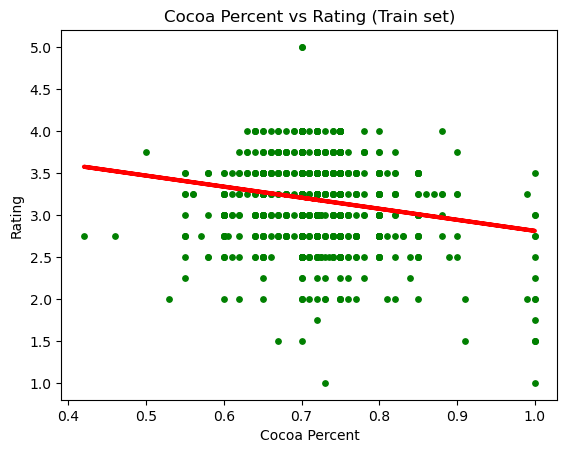

In [54]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating (Train set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

Q: Include your thoughts on how well the model performed on the test set.

A: The R-squared score of the model, which is 0.03, is relatively low. This might indicate that the cocoa percentage alone is not a strong predictor of chocolate bar rating. Other factors, such as the origin or the manufacturing process, may also play a significant role in determining the rating.

Overall, while the negative slope shows a clear relationship between cocoa percent and rating, the low R-squared value suggests that other factors may be important in predicting chocolate bar rating. More analysis is needed. 